<a href="https://colab.research.google.com/github/syedasrar00/imdb_text_analysis_with_simple_RNN/blob/main/imdb_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imdb text Classification

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [2]:
# load the imdb dataset
max_features = 10000 # max vocubulary size
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [4]:
# Inspect a sample review
print("sample review as int", x_train[0])

sample review as int [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print('sample review target as int', y_train[0])

sample review target as int 1


In [6]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

Word Index Offset: In many natural language processing (NLP) tasks, such as training models with the Reuters dataset (or any dataset tokenized using tools like Tokenizer from libraries like Keras), certain reserved indices are used for special tokens:

* 0: Often reserved for padding.
* 1: Reserved for the start token (e.g., representing the beginning of a sequence).
* 2: Reserved for out-of-vocabulary (OOV) words or words that are too rare to be included in the vocabulary.

In [8]:
[reverse_word_index.get(i-3, '?') for i in x_train[0]]

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '?',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '?',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '?',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

In [9]:
max_len = 500 # maximum number of features
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [10]:
# Train the RNN model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(SimpleRNN(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
early_stopping

In [13]:
# Train model with early stopping
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.5761 - loss: 0.9372 - val_accuracy: 0.5980 - val_loss: 0.6520
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.7025 - loss: 0.5685 - val_accuracy: 0.7128 - val_loss: 0.5426
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7430 - loss: 1.8648 - val_accuracy: 0.6466 - val_loss: 0.6013
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.7613 - loss: 0.4950 - val_accuracy: 0.7876 - val_loss: 0.4957
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.7918 - loss: 830.0964 - val_accuracy: 0.6926 - val_loss: 0.5744
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.7964 - loss: 0.4486 - val_accuracy: 0.7628 - val_loss: 0.4888
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.8858 - loss: 0.3055 - val_accuracy: 0.8028 - val_loss: 0.4348
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.9138 - loss: 0.2387 

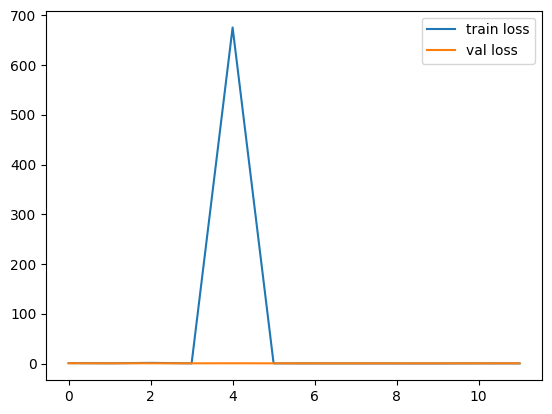

In [18]:
# print loss curve and accuracy curve
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [15]:
model.save('imdb_review_classification.h5')

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Load the pre-trained model
model = tf.keras.models.load_model('imdb_review_classification.h5')

# Load word index and reverse it to map back to words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Function to decode a tokenized review back into words
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Function to preprocess a raw review by tokenizing and padding
def preprocess_review(text):
    return sequence.pad_sequences([[word_index.get(word, 2) for word in text.split()]], maxlen=500)

# Function to predict sentiment of a review
def predict_sentiment(review):
    preprocessed_review_text = preprocess_review(review)
    prediction = model.predict(preprocessed_review_text)
    return 'Positive' if prediction[0][0] > 0.5 else 'Negative', prediction

In [24]:
review = "This movie was fantastic with great acting and a wonderful story"
sentiment, score = predict_sentiment(review)
print(f"Sentiment: {sentiment}, Score: {score}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Sentiment: Positive, Score: [[0.8097098]]


In [25]:
review = "worst movie"
sentiment, score = predict_sentiment(review)
print(f"Sentiment: {sentiment}, Score: {score}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Sentiment: Positive, Score: [[0.9999906]]
